## Introduction

<img src="./assets/agent-definition.jpeg" alt="drawing" style="width:1000px;"/>


## Why LLMs Hallucinate

<img src="./assets/Halluc.png" alt="drawing" style="width:1000px;"/>

### Practical Example

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def sigmoid(X):
   return 1/(1+np.exp(-X))
class VanillaRNN():
  def __init__(self,size=8):
    # define size x size vector
    self.size=size
    self.memory_states=[]
    self.weigths=np.zeros((size*size,size*size))

  def set_memory_state(self,state):
    self.memory_states.append(state)

  def print_memory_states(self):
    total_memory=len(self.memory_states)
    fig, axs = plt.subplots(nrows=total_memory, ncols=1, figsize=(8, 6))
    for ax, memory_state in zip(axs, self.memory_states):
      vector_square=memory_state.reshape(self.size,self.size)
      ax.imshow(vector_square, cmap='gray')
    fig.show()

  def hebbian_learning(self):
    for m in self.memory_states:
        print('State Learned')
        m = np.where(m == 0, -1, m)
        outer_product = np.outer(m, m)
        np.fill_diagonal(outer_product, 0)

        self.weigths += outer_product
    self.weigths /= len(self.memory_states)

  @staticmethod
  def update_state(W, state):
    size = state.size
    new_state = state.copy()
    for i in range(size):
        weighted_sum = np.dot(W[i, :], state)
        new_state[i] = 1 if weighted_sum > 0 else -1
    return new_state

  def recall(self,initial_state):
    current_state = initial_state
    i=0
    while True:
        i+=1
        next_state = self.update_state(self.weigths, current_state)
        if np.array_equal(next_state, current_state):
            print('Convergence reached in',i,'iterations')
            break  # Convergence reached
        current_state = next_state
    return current_state

State Learned
State Learned
State Learned


/var/folders/sb/s7s67brs7q386w68p13yv1sh0000gn/T/ipykernel_416/3911467420.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


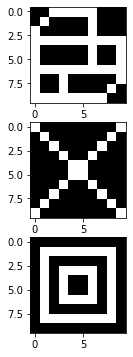

In [7]:
a = VanillaRNN(10)
a.set_memory_state(np.array([0,0,1,1,1,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,1,1,1,1,1,1,1,1,0,0]))
a.set_memory_state(np.array([1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1]))
a.set_memory_state(np.array([0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,1,1,1,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1,0,1,1,1,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0]))
a.hebbian_learning()
a.print_memory_states()

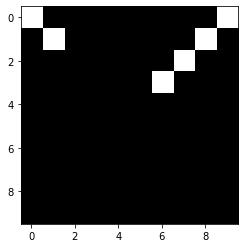

Convergence reached in 2 iterations


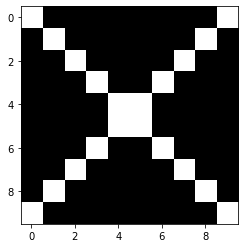

In [8]:
# Teste de Memoria
starting_state=np.array(
[1,0,0,0,0,0,0,0,0,1
,0,1,0,0,0,0,0,0,1,0
,0,0,0,0,0,0,0,1,0,0
,0,0,0,0,0,0,1,0,0,0
,0,0,0,0,0,0,0,0,0,0
,0,0,0,0,0,0,0,0,0,0
,0,0,0,0,0,0,0,0,0,0
,0,0,0,0,0,0,0,0,0,0
,0,0,0,0,0,0,0,0,0,0
,0,0,0,0,0,0,0,0,0,0])
vector_square=starting_state.reshape(10,10)
plt.imshow(vector_square,cmap='gray')
plt.show()
stt=a.recall(starting_state)
vector_square=stt.reshape(10,10)
plt.imshow(vector_square,cmap='gray')
plt.show()

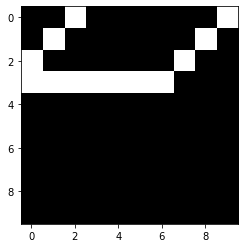

Convergence reached in 2 iterations


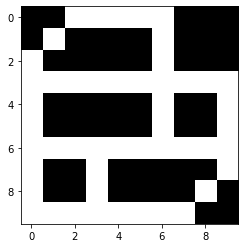

In [9]:
# Teste de Memoria
starting_state=np.array(
[0,0,1,0,0,0,0,0,0,1
,0,1,0,0,0,0,0,0,1,0
,1,0,0,0,0,0,0,1,0,0
,1,1,1,1,1,1,1,0,0,0
,0,0,0,0,0,0,0,0,0,0
,0,0,0,0,0,0,0,0,0,0
,0,0,0,0,0,0,0,0,0,0
,0,0,0,0,0,0,0,0,0,0
,0,0,0,0,0,0,0,0,0,0
,0,0,0,0,0,0,0,0,0,0])
vector_square=starting_state.reshape(10,10)
plt.imshow(vector_square,cmap='gray')
plt.show()
stt=a.recall(starting_state)
vector_square=stt.reshape(10,10)
plt.imshow(vector_square,cmap='gray')
plt.show()

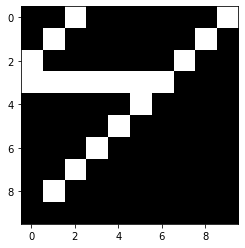

Convergence reached in 3 iterations


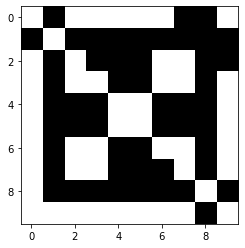

In [10]:
# Teste de Memoria
starting_state=np.array(
[0,0,1,0,0,0,0,0,0,1
,0,1,0,0,0,0,0,0,1,0
,1,0,0,0,0,0,0,1,0,0
,1,1,1,1,1,1,1,0,0,0
,0,0,0,0,0,1,0,0,0,0
,0,0,0,0,1,0,0,0,0,0
,0,0,0,1,0,0,0,0,0,0
,0,0,1,0,0,0,0,0,0,0
,0,1,0,0,0,0,0,0,0,0
,0,0,0,0,0,0,0,0,0,0])
vector_square=starting_state.reshape(10,10)
plt.imshow(vector_square,cmap='gray')
plt.show()
stt=a.recall(starting_state)
vector_square=stt.reshape(10,10)
plt.imshow(vector_square,cmap='gray')
plt.show()

## Understasnding LLMs

### Tokenizers

In [ ]:
@tool
def brick_cg_helper(question):
    """This function queries the Brick Seguros documents with a given question to answer insurance related questions related to Brick Seguros."""
    try:
        
        prompt = ChatPromptTemplate.from_messages(
            [
                ("system", """
                    SUSEP is the brazilian regulator for insurance.
                    You are a specialyzed insurance agent, and excel at understanding SUSEP documents.
                    You are very good at finding information in SUSEP documents.
                    You are very good at generating the best response to insurance related topics.
                    {context}
                 """),
                ("user", """
                Answer this question as best as you can: {question}
            """)]
        )

        chain = (
            {"context": itemgetter("question") | brick_susep_retriever,"question": itemgetter("question")} 
            | prompt 
            | light_model 
        )

        res = chain.invoke({"question": question})

        return res.content
        
    except Exception as error:
        return {"error": str(error)}
brick_cg_helper('Eu sou representante de seguro, posso vender software que só funciona com seguro?')

'Como representante de seguro, você pode assumir a obrigação de promover, ofertar ou distribuir produtos complementares relacionados ao seguro, desde que não haja vínculos de dependência e que cumpra todas as disposições aplicáveis para atuação como representante de seguros, conforme previsto nas normativas da SUSEP. Portanto, a venda de software que só funciona com seguro pode ser possível, desde que esteja em conformidade com as regulamentações vigentes.'

<img src="./assets/question-received.jpeg" alt="drawing" style="width:1000px;"/>


<img src="./assets/tokenizer-schema.jpeg" alt="drawing" style="width:800px;"/>


### Embedding Space

<img src="./assets/ES1.png" alt="drawing" style="width:800px;"/>


<img src="./assets/ES2.png" alt="drawing" style="width:800px;"/>

### Attention Mechanism

<img src="./assets/llm-schema.jpeg" alt="drawing" style="width:1000px;"/>

<img src="./assets/Attention.png" alt="drawing" style="width:1000px;"/>

## Agent

<img src="./assets/agent-tools.jpeg" alt="drawing" style="width:1000px;"/>


# Setup

Loading ENV

In [43]:
## Loading the environment
import os
from operator import itemgetter
from bs4 import BeautifulSoup
import requests
from PyPDF2 import PdfReader
import io
from tqdm import tqdm
import uuid
import os
from langchain_core.documents import Document
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate
from langchain_openai import ChatOpenAI
from langchain.storage import InMemoryByteStore
from langchain_openai import OpenAIEmbeddings
from langchain_community.vectorstores import Chroma
from langchain.retrievers.multi_vector import MultiVectorRetriever
from langchain_text_splitters import RecursiveCharacterTextSplitter
import json
os.getenv('../.env')



light_model = ChatOpenAI(
    model="gpt-3.5-turbo",
    temperature=0,
    verbose=True
  )

powerful_model = ChatOpenAI(
    model="gpt-4-turbo-2024-04-09",
    temperature=0,
    verbose=True
  )


# Data Extraction

## Documentos Internos Brick (Normal Chunking)

In [45]:
main_page=requests.get('https://brickseguros.com.br')
soup = BeautifulSoup(main_page.content, 'lxml')
text=soup.get_text()
links=[]
for link in soup.find_all('a', href=True):
    if 'http' in link['href'] and 'brickseguros.com.br' in link['href'] and 'mailto' not in link['href'] and link['href']!='https://brickseguros.com.br' :
        links.append(link['href'])
links=list(set(links))

for link in links:
    page=requests.get(link)
    soup = BeautifulSoup(page.content, 'lxml')
    text+=soup.get_text()

brickdocuments=text

In [46]:
with open('documents/brick_bs_cg.pdf', 'rb') as file:
    reader = PdfReader(file)
    policy_conditions=''
    for i in range(len(reader.pages)):
        policy_conditions+=reader.pages[i].extract_text()


## Circulares SUSEP (RAPTOR)

### First Extraction

In [ ]:
def get_susep_doc(url):
    r=requests.get(url)
    reader = PdfReader(io.BytesIO(r.content))
    out_str=''
    for i in range(len(reader.pages)):
        out_str+=reader.pages[i].extract_text()
    return out_str

In [ ]:
def get_gov_doc(url):
    r=requests.get(url)
    # Parse the HTML content using BeautifulSoup
    soup = BeautifulSoup(r.text, 'html.parser')

    # Find the div with class 'texto-dou'
    target_div = soup.find('div', class_='texto-dou')

    if target_div:
        # Print the entire text content of the found div, including its children
        return target_div.get_text()
    else:
        print("No div with class 'texto-dou' found")

In [ ]:
docs=[]
links_susep=[]
links_gov=[]
with open('documents/susep_links.txt') as f:
    for line in f:
        if line.startswith('https://www2.susep.gov.br'):
            links_susep.append(line.strip())
        else:
            links_gov.append(line.strip())


In [241]:
for item in tqdm(links_susep):
    try:
        docs.append(get_susep_doc(item))
    except:
        print('Error on',item)
for item in tqdm(links_gov):
    try:
        docs.append(get_gov_doc(item))
    except:
        print('Error on',item)

  5%|▌         | 1/20 [00:01<00:23,  1.23s/it]

Error on https://www2.susep.gov.br/safe/scripts/bnweb/bnmapi.exe?router=upload/27501


 10%|█         | 2/20 [00:03<00:28,  1.58s/it]

 50%|█████     | 10/20 [00:17<00:17,  1.75s/it]

Error on https://www2.susep.gov.br/safe/scripts/bnweb/bnmapi.exe?router=upload/26763


 60%|██████    | 12/20 [00:20<00:11,  1.42s/it]

Error on https://www2.susep.gov.br/safe/scripts/bnweb/bnmapi.exe?router=upload/26431


 80%|████████  | 16/20 [00:25<00:05,  1.25s/it]

Error on https://www2.susep.gov.br/safe/bnportal/internet/pt-BR/search?exp=453%2Fnumero%20%22RESOLUCAO%20CNSP%22%2Fdis


 95%|█████████▌| 19/20 [00:30<00:01,  1.53s/it]

In [ ]:
for index,item in enumerate(docs):
    with open(f'documents/raw_susep/{index}.txt','w') as f:
        f.write(item)

### Extraction to index

In [82]:
susep_docs=[]
for file in os.listdir('documents/raw_susep'):
    with open(f'documents/raw_susep/{file}','r') as f:
        susep_docs.append(f.read())

## Código Civil (Multi Representation)

In [4]:
with open('documents/codcivil.html','r',encoding='utf-8') as f:
    soup = BeautifulSoup(f.read(), 'lxml')
#get all elements inside mais soup
elements = soup.find_all(recursive=False)[0].find_all(recursive=False)[0].find_all(recursive=False)
textelements=[x.get_text().strip() for x in elements]


In [5]:
livro=''
titulo=''
capitulo=''
secao=''
subsecao=''
outstr=''
lastwastext=False
codigo_civill=[]
for item in textelements:
    if item.startswith('LIVRO'):
        if lastwastext:
            codigo_civill.append(outstr)
        livro=item
        titulo=''
        capitulo=''
        secao=''
        subsecao=''
        outstr=''
        lastwastext=False
    elif item.startswith('TÍTULO'):
        if lastwastext:
            codigo_civill.append(outstr)
        titulo=item
        capitulo=''
        secao=''
        subsecao=''
        outstr=''
        lastwastext=False
    elif item.startswith('CAPÍTULO'):
        if lastwastext:
            codigo_civill.append(outstr)
        capitulo=item
        secao=''
        subsecao=''
        outstr=''
        lastwastext=False
    elif item.startswith('Seção'):
        if lastwastext:
            codigo_civill.append(outstr)
        secao=item
        subsecao=''
        outstr=''
        lastwastext=False
    elif item.startswith('SUBSEÇÃO'):
        if lastwastext:
            codigo_civill.append(outstr)
        subsecao=item
        outstr=''
        lastwastext=False
    else:
        if not lastwastext:
            outstr+=f'{livro} - {titulo} - {capitulo} - {secao} - {subsecao}\n'
        lastwastext=True
        outstr += item+'\n'


# Indexing

## Brick

In [87]:

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=500, 
    chunk_overlap=50, 
    separators=["#######", "\n", "\r\n", "\r"],
)

texts = text_splitter.split_text(brickdocuments)
documents = text_splitter.create_documents(texts)
print(len(documents))
db = Chroma.from_documents(documents, OpenAIEmbeddings(
),collection_name='brick_general')

brick_general_retriever = db.as_retriever(collection_name='brick_general')

71


In [67]:

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=500, 
    chunk_overlap=50, 
    separators=["#######", "\n", "\r\n", "\r"],
)

texts = text_splitter.split_text(policy_conditions)
documents = text_splitter.create_documents(texts)
print(len(documents))
db2 = Chroma.from_documents(documents, OpenAIEmbeddings(
),collection_name='insurance_brick')

brick_insurance_retriever = db2.as_retriever(collection_name='insurance_brick')

320


## SUSEP

In [89]:
texts='#####################################'.join(susep_docs)
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=500, 
    chunk_overlap=50, 
    separators=["#######", "\n", "\r\n", "\r"],
)

texts = text_splitter.split_text(texts)
documents = text_splitter.create_documents(texts)
print(len(documents))
db = Chroma.from_documents(documents, OpenAIEmbeddings(
),collection_name='susep')

brick_susep_retriever = db.as_retriever(collection_name='susep')

2125


## Código civil

In [9]:
chain = (
    {"doc": lambda x: x.page_content}
    | ChatPromptTemplate.from_template("Summarize os seguintes documentos::\n\n{doc}")
    | light_model
    | StrOutputParser()
)
docs=[Document(x) for x in codigo_civill]
summaries = chain.batch(docs, {"max_concurrency": 5})

with open('cod_civil_summaries.json','w') as f:
    json.dump(summaries, f)

In [26]:
from langchain.storage import InMemoryByteStore
from langchain_openai import OpenAIEmbeddings
from langchain_community.vectorstores import Chroma
from langchain.retrievers.multi_vector import MultiVectorRetriever

# The vectorstore to use to index the child chunks
vectorstore_cc = Chroma(collection_name="summaries",
                     embedding_function=OpenAIEmbeddings())

# The storage layer for the parent documents
store = InMemoryByteStore()
id_key = "doc_id"

# The retriever
retriever_cc = MultiVectorRetriever(
    vectorstore=vectorstore_cc,
    byte_store=store,
    id_key=id_key,
    search_kwargs={"k": 5}

)
doc_ids = [str(uuid.uuid4()) for _ in docs]

# Docs linked to summaries
summary_docs = [
    Document(page_content=s, metadata={id_key: doc_ids[i]})
    for i, s in enumerate(summaries)
]

# Add
retriever_cc.vectorstore.add_documents(summary_docs)
retriever_cc.docstore.mset(list(zip(doc_ids, docs)))

# Tools

### File Reading

### Chart Plotting

### Database Query

### Insurance Questions

### Road Traffic Legislation Search

### Quote Policy

### Issue Policy

### Open Claim

# Initializing the Agent

## Exec

## References



Attention is all you need - https://arxiv.org/pdf/1706.03762.pdf
